<a href="https://colab.research.google.com/github/unggaputra/AnalisisBigData/blob/main/OULAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OULAD - EDA & Data preprocessing

Ungga Putra Mahendra - 202010370311391

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

OULAD berisi data tentang mata kuliah, siswa dan interaksi mereka dengan Virtual Learning Environment (VLE) untuk tujuh mata kuliah yang dipilih (disebut modul). Presentasi kursus dimulai pada bulan Februari dan Oktober - masing-masing ditandai dengan “B” dan “J”. Kumpulan data terdiri dari tabel yang terhubung menggunakan pengidentifikasi unik

# Assessments

'Assessments' berisi informasi tentang penilaian dalam module presentation. Biasanya setiap presentation memiliki sejumlah penilaian yang dilanjutkan dengan ujian akhir.

In [20]:
a = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analisis Big Data/Tugas 1/Dataset/assessments.csv')

In [21]:
a.sample(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
111,EEE,2013J,30711,TMA,124.0,28.0
39,BBB,2014B,15018,CMA,152.0,1.0
20,BBB,2013B,14987,TMA,124.0,18.0
106,DDD,2014J,25366,TMA,146.0,25.0
205,GGG,2014J,37444,Exam,229.0,100.0
99,DDD,2014B,25359,TMA,158.0,20.0
69,CCC,2014J,24292,TMA,109.0,22.0
109,EEE,2013J,30709,TMA,33.0,16.0
18,BBB,2013B,14985,TMA,47.0,18.0
118,EEE,2014B,30718,Exam,228.0,100.0




*   code_module - kode identifikasi modul, di mana penilaian tersebut berada.
*   code_presentation - kode identifikasi presentation, di mana penilaian tersebut berada.
*   id_assessment - nomor identifikasi penilaian
*   assessment_type - jenis penilaian. Ada tiga jenis penilaian: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) dan Ujian Akhir (Exam)
*   date - informasi mengenai tanggal penyerahan akhir penilaian yang dihitung sebagai jumlah hari sejak dimulainya module presentation. Tanggal mulai presentasi diberi angka 0 (nol).
*   weight - bobot penilaian dalam persen (%). Biasanya, ujian diperlakukan secara terpisah dan memiliki bobot 100%; jumlah seluruh penilaian lainnya adalah 100%







In [172]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [173]:
a.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [174]:
a.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

karena terdapat missing value 11 pada date, kita isi dengan mean

In [175]:
mean_value=a['date'].mean()
a['date'].fillna(value=mean_value, inplace=True)

In [176]:
a.isna().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

# Student Assessment

Student assessment berisi hasil penilaian siswa. jika siswa tidak menyerahkan penilaian, tidak ada hasil yang dicatat. penyerahan ujian akhir akan hilang, jika hasil penilaian tidak tersimpan di sistem.

In [11]:
sa = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analisis Big Data/Tugas 1/Dataset/studentAssessment.csv')

In [12]:
sa.sample(10)

,id_assessment,id_student,date_submitted,is_banked,score
26998,15006,570759,168,0,100.0
29103,15008,620126,11,0,60.0
16344,14997,265170,46,0,75.0
33393,15012,629507,173,0,74.0
138766,34893,83603,224,0,85.0
77582,25349,558765,53,0,73.0
15797,14996,606685,18,0,90.0
18444,14998,57079,95,0,65.0
54970,24291,1490624,15,0,92.0
86553,25359,118479,159,0,82.0




*   id_assessment – nomor identifikasi penilaian.
*   id_student – nomor identifikasi unik untuk siswa.
*   date_submitted – tanggal penyerahan siswa, diukur sebagai jumlah hari sejak dimulainya presentasi modul.
*   is_banked – tanda status yang menunjukkan bahwa hasil penilaian telah ditransfer dari presentasi sebelumnya.
*   score – skor siswa dalam penilaian ini. range dari 0 hingga 100. Skor yang lebih rendah dari 40 diartikan sebagai Gagal.





In [153]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [154]:
sa.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [155]:
sa.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [157]:
score_sum = sa.groupby('score').sum()
print(score_sum)

       id_assessment   id_student  date_submitted  is_banked
score                                                       
0.0          8472106    194161628           37240          1
1.0         11125407    526749179           12073          0
2.0           315791      6621808            1216          0
3.0           456350      8452111            2101          1
4.0           732946     18659689            4532          0
...              ...          ...             ...        ...
96.0        75705409   1889823714          281888         21
97.0        44681249   1079040762          155348         10
98.0        55643510   1446409699          185995         25
99.0        24142315    588452578           75448          3
100.0      439191890  13018490816         2269165        166

[101 rows x 4 columns]


karena fitur score memiliki variabel nilai, maka kita isi missing value dengan 0

In [158]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
sa.score = imputer.fit_transform(sa['score'].values.reshape(-1,1))[:,0]

In [159]:
sa.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

<Axes: >

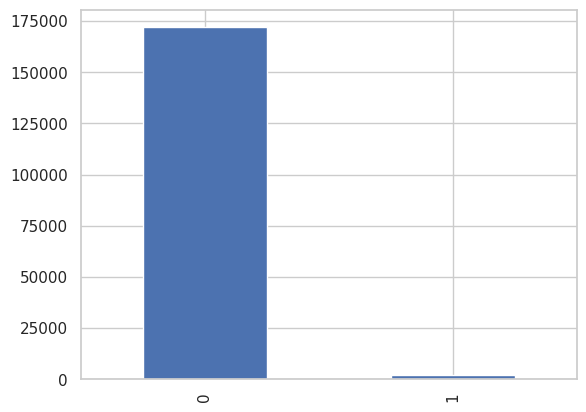

In [160]:
sa.is_banked.value_counts()[sa.is_banked.unique()].plot(kind='bar')

karena ini adalah nilai yang krusial, maka kita biarkan

# Student Info

Student info berisi informasi demografis tentang siswa beserta hasilnya.

In [82]:
si = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analisis Big Data/Tugas 1/Dataset/studentInfo.csv')

In [60]:
si.sample(10)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
22758,FFF,2013B,471977,M,South West Region,Lower Than A Level,40-50%,0-35,0,60,N,Pass
24378,FFF,2013J,475699,M,South Region,A Level or Equivalent,70-80%,0-35,0,90,N,Withdrawn
18938,DDD,2014J,684480,M,South East Region,HE Qualification,70-80%,55<=,0,60,N,Distinction
12107,CCC,2014J,635802,F,South East Region,A Level or Equivalent,90-100%,0-35,0,90,N,Distinction
28357,FFF,2014J,597391,M,South East Region,A Level or Equivalent,90-100%,0-35,0,120,N,Withdrawn
682,AAA,2014J,2165164,F,South West Region,Lower Than A Level,10-20,0-35,0,60,N,Pass
25586,FFF,2013J,598268,F,West Midlands Region,Lower Than A Level,0-10%,35-55,0,120,N,Withdrawn
5439,BBB,2014B,599769,F,South Region,Lower Than A Level,60-70%,0-35,0,150,Y,Fail
13764,DDD,2013B,530901,M,London Region,Lower Than A Level,70-80%,0-35,0,90,N,Withdrawn
7391,BBB,2014J,647126,F,North Region,Lower Than A Level,10-20,0-35,0,60,N,Withdrawn


*   code_module – kode identifikasi untuk modul tempat siswa terdaftar.
*   code_presentation - kode identifikasi presentasi saat siswa terdaftar pada modul.
*   id_student – nomor identifikasi unik untuk siswa.
*   gender – jenis kelamin siswa.
*   region – mengidentifikasi wilayah geografis, tempat tinggal siswa saat mengambil presentasi modul.
*   highest_education – tingkat pendidikan siswa tertinggi saat masuk ke presentasi modul.
*   imd_band – menentukan pita Indeks Kerusakan Berganda dari tempat siswa tinggal selama presentasi modul.
*   age_band – kelompok usia siswa.
*   num_of_prev_attempts – berapa kali siswa mencoba modul ini.
*   study_credits – jumlah total SKS untuk modul yang sedang dipelajari siswa.
*   disability – menunjukkan apakah siswa disabilitas
*   final_result – hasil akhir siswa dalam presentasi modul.







In [62]:
si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [42]:
si.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [63]:
si.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [78]:
imd_band_sum = si.groupby('imd_band').sum()
print(imd_band_sum)

          id_student  num_of_prev_attempts  studied_credits
imd_band                                                   
0-10%     2284182381                   696           272430
10-20     2403243621                   638           285175
20-30%    2467407664                   628           302425
30-40%    2562245088                   579           285860
40-50%    2271543873                   525           262725
50-60%    2267144160                   483           242660
60-70%    2071598237                   469           223170
70-80%    2059743094                   381           222520
80-90%    2016824133                   433           216335
90-100%   1852246333                   347           197950


<ipython-input-78-51e7d42d83be>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  imd_band_sum = si.groupby('imd_band').sum()


imd_band memiliki informasi terkait jaringan yang jelek, jika tidak ada value bisa dikatakan bahwa mereka memiliki jaringan yang baik. okeh karena itu, missing value pada fitur imd_band kita isi dengan nilai terendah, yaitu '0-10%'

In [83]:
imputer = SimpleImputer(strategy='constant', fill_value='0-10%')
si.imd_band = imputer.fit_transform(si['imd_band'].values.reshape(-1,1))[:,0]

setelah itu kita ubah nilai '10-20' menjadi '10-20%' agar tidak terjadi bias

In [87]:
si['imd_band'].replace(['10-20'],['10-20%'], inplace=True)

In [88]:
imd_band_sum = si.groupby('imd_band').sum()
print(imd_band_sum)

          id_student  num_of_prev_attempts  studied_credits
imd_band                                                   
0-10%     3061074997                   837           360755
10-20%    2403243621                   638           285175
20-30%    2467407664                   628           302425
30-40%    2562245088                   579           285860
40-50%    2271543873                   525           262725
50-60%    2267144160                   483           242660
60-70%    2071598237                   469           223170
70-80%    2059743094                   381           222520
80-90%    2016824133                   433           216335
90-100%   1852246333                   347           197950


<ipython-input-88-51e7d42d83be>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  imd_band_sum = si.groupby('imd_band').sum()


In [80]:
si.isna().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
imd_band_sum            0
dtype: int64

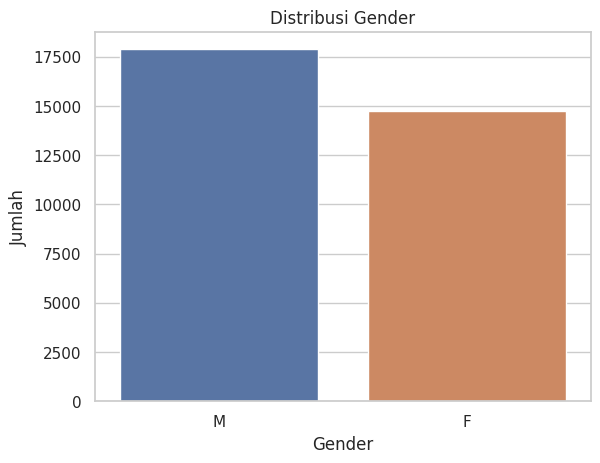

In [101]:
sns.countplot(x='gender', data=si)
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

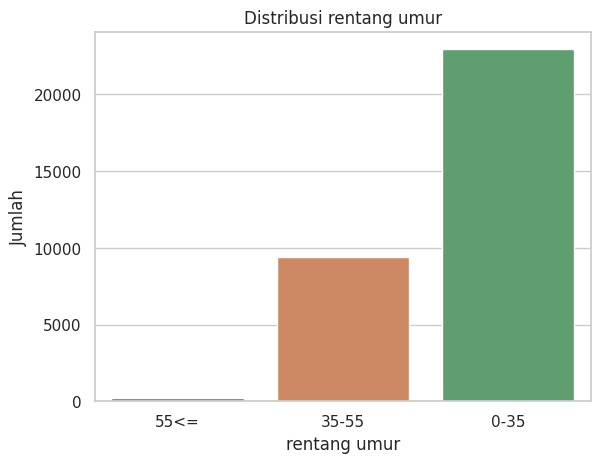

In [120]:
sns.countplot(x='age_band', data=si)
plt.title('Distribusi rentang umur')
plt.xlabel('rentang umur')
plt.ylabel('Jumlah')
plt.show()

<Axes: >

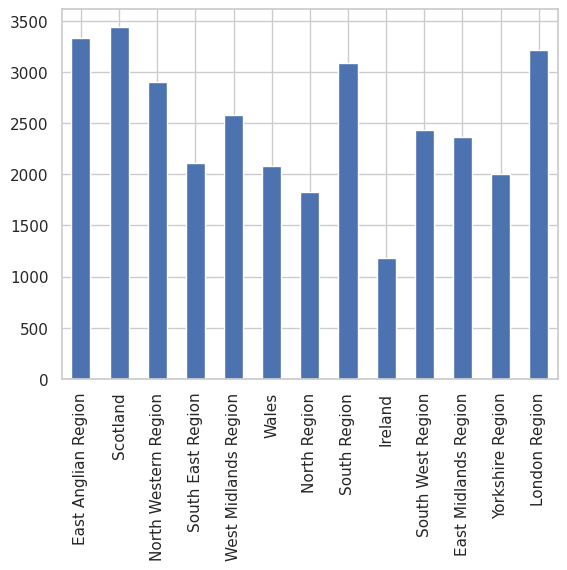

In [104]:
si.region.value_counts()[si.region.unique()].plot(kind='bar')

<Axes: >

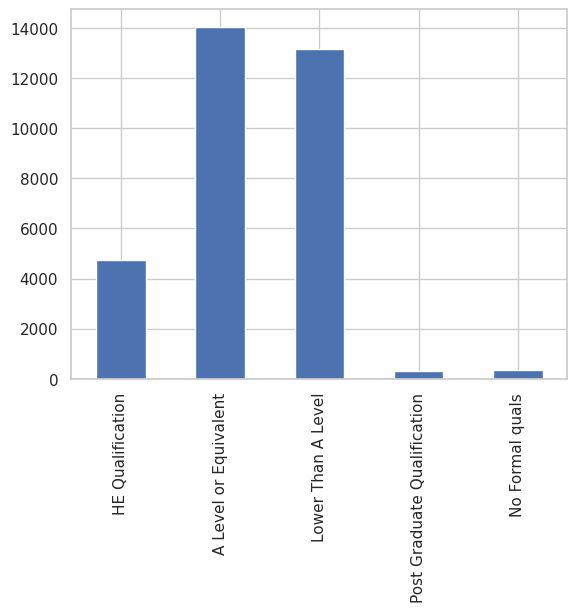

In [171]:
si.highest_education.value_counts()[si.highest_education.unique()].plot(kind='bar')

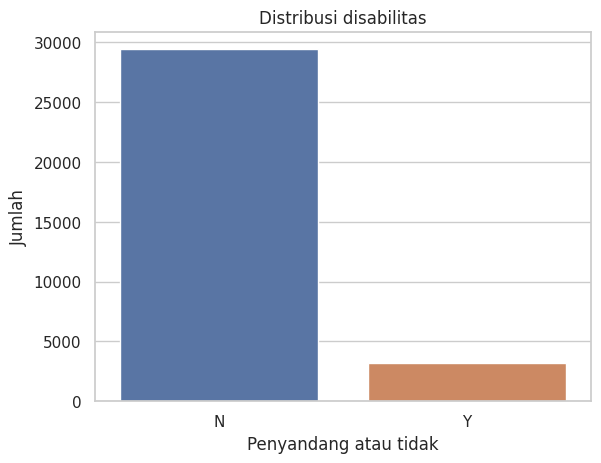

In [108]:
sns.countplot(x='disability', data=si)
plt.title('Distribusi disabilitas')
plt.xlabel('Penyandang atau tidak')
plt.ylabel('Jumlah')
plt.show()

terdapat data yang tidak seimbang pada distribusi disabilitas, karena data tersebut sangat beresiko maka kita biarkan

In [118]:
num_of_prev_attempts_sum = si.groupby('num_of_prev_attempts').sum()
print(num_of_prev_attempts_sum)

                       id_student  studied_credits
num_of_prev_attempts                              
0                     20076510059          2178225
1                      2318022403           331265
2                       467910137            68885
3                       111275714            14990
4                        30574517             4490
5                        24539453             1260
6                         4238917              460


<ipython-input-118-4ecb37861cda>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  num_of_prev_attempts_sum = si.groupby('num_of_prev_attempts').sum()


In [119]:
si.corr()

<ipython-input-119-ce21886e97e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  si.corr()


,id_student,num_of_prev_attempts,studied_credits
id_student,1.000000,0.011473,-0.003868
num_of_prev_attempts,0.011473,1.000000,0.181729
studied_credits,-0.003868,0.181729,1.000000


# Student Registration

Student registration berisi informasi waktu mahasiswa mendaftar presentasi modul.

In [15]:
sr = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analisis Big Data/Tugas 1/Dataset/studentRegistration.csv')

In [17]:
sr.sample(10)

,code_module,code_presentation,id_student,date_registration,date_unregistration
28776,FFF,2014J,646460,-64.0,NaN
30261,GGG,2013J,563612,-29.0,NaN
8675,CCC,2014B,69494,-103.0,22.0
16120,DDD,2013J,1592048,-151.0,9.0
22364,FFF,2013B,149680,-135.0,NaN
27751,FFF,2014J,135280,-23.0,NaN
29025,FFF,2014J,652890,-72.0,NaN
7051,BBB,2014J,603055,-38.0,NaN
26464,FFF,2014B,467582,-13.0,NaN
13587,DDD,2013B,491693,-11.0,NaN


*   code_module – kode identifikasi untuk sebuah modul.
*   code_presentation - kode identifikasi presentasi.
*   id_student – nomor identifikasi unik untuk siswa.
*   date_registration – tanggal pendaftaran siswa pada presentasi modul, ini adalah jumlah hari yang diukur relatif terhadap dimulainya presentasi modul (misalnya nilai negatif -30 berarti siswa mendaftar untuk presentasi modul 30 hari sebelum presentasi modul dimulai).
*   date_unregistration – tanggal pembatalan registrasi siswa dari presentasi modul, ini adalah jumlah hari yang diukur relatif terhadap awal presentasi modul. Siswa yang menyelesaikan kursus mengosongkan bidang ini. Siswa yang unreg memiliki Withdrawal sebagai nilai kolom final_result pada file studentInfo.csv.



In [134]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [135]:
sr.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [136]:
sr.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [137]:
date_registration_sum = sr.groupby('date_registration').sum()
print(date_registration_sum)

                   id_student  date_unregistration
date_registration                                 
-322.0                 571732               -317.0
-321.0                 891382               -223.0
-320.0                 534428                -73.0
-312.0                5024092                -75.0
-311.0                 200372                150.0
...                       ...                  ...
 83.0                  446397                  0.0
 101.0                 305535                  0.0
 110.0                 357851                  0.0
 124.0                 472949                  0.0
 167.0                 596620                193.0

[332 rows x 2 columns]


<ipython-input-137-5d35bf3480cd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  date_registration_sum = sr.groupby('date_registration').sum()


untuk date registration dikarenakan ini adalah tanggal pendaftaran, missing value kita handle dengan mengisinya dengan mean

In [151]:
mean_value=sr['date_registration'].mean()
sr['date_registration'].fillna(value=mean_value, inplace=True)

In [138]:
date_unregistration_sum = sr.groupby('date_unregistration').sum()
print(date_unregistration_sum)

                     id_student  date_registration
date_unregistration                               
-365.0                   535460                0.0
-317.0                   571732             -322.0
-297.0                   301128             -305.0
-274.0                   263022             -295.0
-271.0                   485943             -274.0
...                         ...                ...
 239.0                   475163             -135.0
 240.0                  8277618             -588.0
 241.0                  2930841             -487.0
 242.0                  2391984             -101.0
 444.0                   586851              -22.0

[416 rows x 2 columns]


<ipython-input-138-14454a086685>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  date_unregistration_sum = sr.groupby('date_unregistration').sum()


karena ini adalah fitur yang memiliki value pembatalan registrasi, kita isi dengan nilai 0 karena tidak mengundurkan diri

In [142]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
sr.date_unregistration = imputer.fit_transform(sr['date_unregistration'].values.reshape(-1,1))[:,0]

In [152]:
sr.isna().sum()

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64

# VLE

VLE berisi informasi tentang materi yang tersedia di VLE. biasanya informasi tersebut adalah halaman html, file pdf, dll. siswa memiliki akses ke materi ini secara online dan interaksi mereka dengan materi dicatat

In [18]:
vle = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analisis Big Data/Tugas 1/Dataset/vle.csv')

In [19]:
vle.sample(10)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
2756,674150,DDD,2013J,subpage,NaN,NaN
5336,779625,FFF,2014B,subpage,4.0,4.0
3217,772705,DDD,2014B,homepage,NaN,NaN
21,546923,AAA,2013J,resource,NaN,NaN
1878,1011842,CCC,2014J,url,NaN,NaN
2089,547931,DDD,2013B,subpage,NaN,NaN
3807,790831,EEE,2014B,oucontent,NaN,NaN
5027,716293,FFF,2013J,oucontent,11.0,11.0
4575,716239,FFF,2013J,oucontent,1.0,1.0
688,543289,BBB,2013B,resource,NaN,NaN


*   id_site – nomor identifikasi materi.
*   code_module – kode identifikasi untuk modul.
*   code_presentation - kode identifikasi presentasi.
*   Activity_type – peran yang terkait dengan materi modul.
*   week_from – minggu dimana bahan tersebut direncanakan akan digunakan.
*   week_to – minggu sampai bahan tersebut direncanakan akan digunakan.



In [121]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [123]:
vle.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [124]:
week_from_sum = vle.groupby('week_from').sum()
print(week_from_sum)

            id_site  week_to
week_from                   
0.0         1587385      0.0
1.0        62362302     88.0
2.0        31589439     82.0
3.0        26164375    107.0
4.0        17962801     96.0
5.0        26303380    169.0
6.0        13164851    102.0
7.0        11597470    105.0
8.0        27974945    290.0
9.0        41479302    468.0
10.0       31287165    400.0
11.0       36884192    517.0
12.0       20364332    312.0
13.0       23954034    403.0
14.0       24390177    448.0
15.0       35703387    690.0
16.0       21003947    432.0
17.0        2878884     68.0
18.0       71749701   1638.0
19.0       22538246    551.0
20.0       33494145    860.0
21.0       40314418   1071.0
22.0       29555324    836.0
23.0       25791732    759.0
24.0       25672441    792.0
25.0       17781907    600.0
26.0       23332050    780.0
27.0       37426653   1323.0
28.0       49969247   1764.0
29.0       36141267   1305.0


<ipython-input-124-1ed8f6ad08a3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week_from_sum = vle.groupby('week_from').sum()


In [125]:
week_to_sum = vle.groupby('week_to').sum()
print(week_to_sum)

          id_site  week_from
week_to                     
0.0       1587385        0.0
1.0      59084555       80.0
2.0      34867186       86.0
3.0      24525454       99.0
4.0      19601722      102.0
5.0      24664501      155.0
6.0      13164851      102.0
7.0      13236349      115.0
8.0      26336067      272.0
9.0      43118180      484.0
10.0     31287165      400.0
11.0     36884192      517.0
12.0     20364332      312.0
13.0     23954034      403.0
14.0     24390177      448.0
15.0     35703387      690.0
16.0     21003947      432.0
17.0      2878884       68.0
18.0     71749701     1638.0
19.0     22538246      551.0
20.0     33494145      860.0
21.0     40314418     1071.0
22.0     29555324      836.0
23.0     25791732      759.0
24.0     25672441      792.0
25.0     17781907      600.0
26.0     23332050      780.0
27.0     37426653     1323.0
28.0     49969247     1764.0
29.0     36141267     1305.0


<ipython-input-125-e7e12e91a1f5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week_to_sum = vle.groupby('week_to').sum()


karena banyak missing value, kita ubah ke nilai default atau 0 karena fitur tersebut memiliki value bertipe floa

In [126]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
vle.week_from = imputer.fit_transform(vle['week_from'].values.reshape(-1,1))[:,0]
vle.week_to = imputer.fit_transform(vle['week_to'].values.reshape(-1,1))[:,0]

In [127]:
vle.isna().sum()

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64

<Axes: >

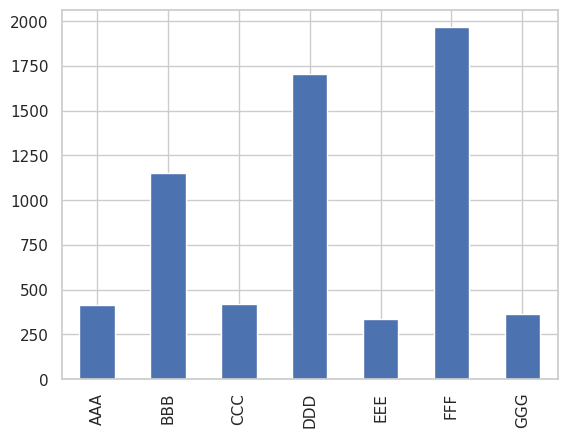

In [162]:
vle.code_module.value_counts()[vle.code_module.unique()].plot(kind='bar')

<Axes: >

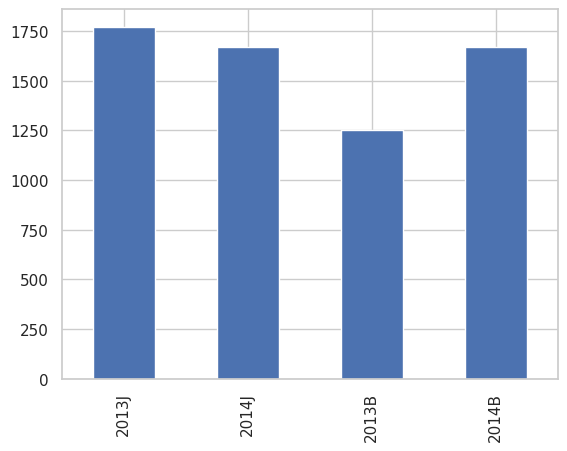

In [163]:
vle.code_presentation.value_counts()[vle.code_presentation.unique()].plot(kind='bar')

<Axes: >

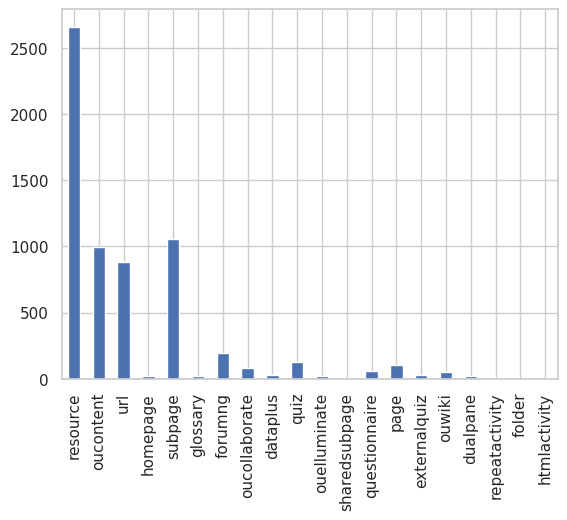

In [133]:
vle.activity_type.value_counts()[vle.activity_type.unique()].plot(kind='bar')